<a href="https://colab.research.google.com/github/barabonda/SK-AI-FLY/blob/main/7%EC%A3%BC%EC%B0%A8/LangChain_07_Retrieval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install openai langchain tiktoken sentence_transformers chromadb pypdf

  Using cached openai-1.10.0-py3-none-any.whl (225 kB)
  Using cached langchain-0.1.4-py3-none-any.whl (803 kB)
  Using cached tiktoken-0.5.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (2.0 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.8/132.8 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 509.0/509.0 kB 29.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 284.0/284.0 kB 22.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.9/75.9 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 59.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.9/235.9 kB 25.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.0/54.0 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 71.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.7/60.7 kB 7

In [ ]:
import os

os.environ['OPENAI_API_KEY'] = '3a9d04966a3c43ca92de7be4b803d6f7'
os.environ['AZURE_OPENAI_ENDPOINT'] = 'https://skyfly-001.openai.azure.com/'
os.environ['OPENAI_API_TYPE'] = 'azure'
os.environ['OPENAI_API_VERSION'] = '2023-05-15'

In [ ]:
# 토큰 수를 세는 부분
import tiktoken

tokenizer = tiktoken.get_encoding('cl100k_base')

def tiktoken_len(text):
  tokens = tokenizer.encode(text)
  return len(tokens)

In [ ]:
# PDF 파일을 로드 하는 부분
from langchain.document_loaders import PyPDFLoader

loader = PyPDFLoader('/content/[정책브리프 2021-04] 탄소중립 대응을 위한 정부 정책과 동향 (1) (1).pdf')
pages = loader.load_and_split()

In [ ]:
# Data Split 하는 부분
from langchain.text_splitter import RecursiveCharacterTextSplitter

text_splitter = RecursiveCharacterTextSplitter(
                  chunk_size=500,
                  chunk_overlap=50,
                  length_function=tiktoken_len
)

docs = text_splitter.split_documents(pages)

In [ ]:
# Embedding model을 준비한다.
from langchain.embeddings import HuggingFaceBgeEmbeddings

model_name = 'jhgan/ko-sbert-nli'
model_kwargs = {'device':'cpu'}
encode_kwargs = {'normalize_embeddings':True}

hf = HuggingFaceBgeEmbeddings(
        model_name = model_name,
        model_kwargs = model_kwargs,
        encode_kwargs = encode_kwargs
)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/123 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/4.46k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/620 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/443M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/538 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/248k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/495k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
# Vector store에 데이터를 저장한다.
from langchain.vectorstores import Chroma

db = Chroma.from_documents(docs,hf)

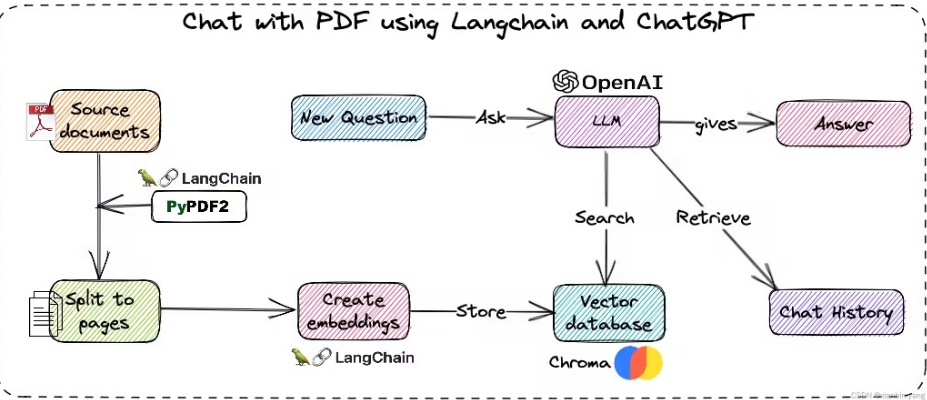

지금까지한 것이 Vector database
chain을 사용하여 Vector database가 LLM에게 알맞는 데이터를 주고 LLM이 사용자의 질문에 맞게 답을 생성한다

In [ ]:
from langchain.chat_models import AzureChatOpenAI
from langchain.chains import RetrievalQA

openai = AzureChatOpenAI(
            deployment_name = 'dev-gpt-35-turbo',
)

qa = RetrievalQA.from_chain_type(llm = openai,
                                 chain_type='stuff',
                                 retriever = db.as_retriever(
                                     search_type='mmr',
                                     search_kwargs={'k':3, 'fetch_k':10}),
                                 return_source_documents=True)# 10개의 결과 중 3개의 결과를 사용할 때 'retriever'사용

In [ ]:
query = "탄소 중립 사회란 무엇인가?"

result = qa(query)
print(result)

{'query': '탄소 중립 사회란 무엇인가?', 'result': '탄소 중립 사회는 개인, 회사, 단체 등에서 발생하는 탄소 배출량과 흡수량을 같게 만들어 탄소 순배출이 제로(0)가 되도록 하는 개념입니다. 즉, 사회 전반적으로 온실가스 배출을 최소화하고 남은 배출량은 탄소를 흡수하여 제로(0)로 만드는 것을 목표로 합니다. 이는 기후변화에 대응하기 위한 글로벌 추세로, 지구 온난화로 인한 이상기후 현상을 예방하고 지속 가능한 발전을 위해 중요한 개념입니다.', 'source_documents': [Document(page_content='01이노비즈 정책브리프\n01 탄소중립과 대응 필요성\n탄소중립이란 ?\n∙탄소중립은 개인·회사·단체 등에서 배출되는 탄소와 흡수되는 탄소량을 같게 해 탄소 ‘순배출이 제\n로(0)’가 되게 하는 것으로 , ‘넷-제로(Net-Zero)’ 라 부르기도 함\n- 인간의 활동에 의한 온실가스 * 배출을 최대한 줄이고 , 남은 온실가스는 흡수, 제거하여 ‘순배출이 제로\n(0)’가 되는 개념이며 , 기후변화에 대응하기 위한 글로벌 추세로 자리 잡고 있음\n*온실가스란 ‘지구 대기를 오염시켜 온실 효과를 일으키는 가스’를 통틀어 이르는 말로, 이산화탄소 (CO2), 메탄(CH4), 아산화질소 (N2O), 수\n소불화탄소 (HFCs), 과불화탄소 (PFCs), 육불화황 (SF6) 등은 배출 규제 및 거래의 대상이 되고 있음 \n대응 필요성\n∙지구 온난화로 인한 폭염, 폭설, 태풍, 산불 등 이상기후 현상이 세계 곳곳에서 발생되고 있는 가\n운데 기후변화 문제에 대한 국제사회의 공동 대응 필요성이 대두됨', metadata={'page': 3, 'source': '/content/[정책브리프 2021-04] 탄소중립 대응을 위한 정부 정책과 동향 (1) (1).pdf'}), Document(page_content='이노비즈 정책브리프\nI n n o b i z  P o l i c y  B r i e f\n2021.05\n탄소중립 

In [ ]:
result['result'] #최종적인 결과는 딕셔너리이기 때문에 결과를 이렇게 뽑아보았다.

'탄소 중립 사회는 개인, 회사, 단체 등에서 발생하는 탄소 배출량과 흡수량을 같게 만들어 탄소 순배출이 제로(0)가 되도록 하는 개념입니다. 즉, 사회 전반적으로 온실가스 배출을 최소화하고 남은 배출량은 탄소를 흡수하여 제로(0)로 만드는 것을 목표로 합니다. 이는 기후변화에 대응하기 위한 글로벌 추세로, 지구 온난화로 인한 이상기후 현상을 예방하고 지속 가능한 발전을 위해 중요한 개념입니다.'

k = 3<br/>
탄소 중립 사회란 개인, 회사, 단체 등이 배출하는 탄소와 흡수하는 탄소의 양을 같게 만들어 탄소 순배출을 제로로 만드는 것을 말합니다. 이는 온실가스 배출을 최소화하고 남은 온실가스를 흡수 또는 제거하여 기후변화에 대응하는 개념입니다. 탄소 중립 사회는 글로벌 추세로서 기후변화에 대응하기 위해 중요한 목표로 인식되고 있습니다.

k = 7<br/>
탄소 중립 사회는 개인, 회사, 단체 등에서 발생하는 탄소 배출량과 흡수량이 같아져서 탄소 순배출이 제로(0)가 되는 상태를 말합니다. 즉, 인간의 활동으로 인해 발생하는 온실가스 배출량을 최소화하고, 남은 온실가스는 흡수 또는 제거하여 탄소 중립 상태를 달성하는 것입니다. 이는 기후변화에 대응하기 위한 글로벌 추세로서, 온실가스의 대기오염을 줄이고 지구 온난화를 방지하기 위한 중요한 개념입니다.

k = 9<br/>
탄소 중립 사회는 개인, 기업, 단체 등에서 배출되는 탄소와 흡수되는 탄소량이 같게 되어 순배출이 제로가 되는 상태를 말합니다. 즉, 온실가스 배출을 최대한 줄이고 남은 온실가스를 흡수 또는 제거하여 탄소 순배출을 제로로 만드는 것을 목표로 합니다. 탄소 중립 사회는 기후변화에 대응하기 위한 글로벌 추세로 자리 잡고 있으며, 이를 위해 다양한 정부 정책과 기업의 노력이 필요합니다.